In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import re
import datetime

jnnknk

In [3]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df=pd.read_csv(url, sep=";")

In [52]:
# Sjekker for NaN verdier i datasett
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
Test                                         0
Test2                                        0
dtype: int64

In [54]:
df["Passasjerer_Ombord"].value_counts()

 0     957
 1     590
 2     529
 3     445
 4     417
      ... 
 42      1
 40      1
-39      1
 35      1
-34      1
Name: Passasjerer_Ombord, Length: 70, dtype: int64

In [55]:
df["Kjøretøy_Kapasitet"].value_counts()

106    1805
112     791
151     690
115     492
105     475
80      452
72      398
130     205
71      193
69      174
75       89
33       68
77       45
76       45
47       39
70       34
103       4
102       1
Name: Kjøretøy_Kapasitet, dtype: int64

In [56]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Test,Test2
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,105300,105353
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,131200,131220
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,101900,101856
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,135100,135204
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,73300,73413


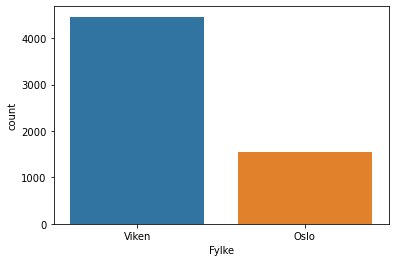

In [57]:
sns.countplot(x='Fylke', data=df);

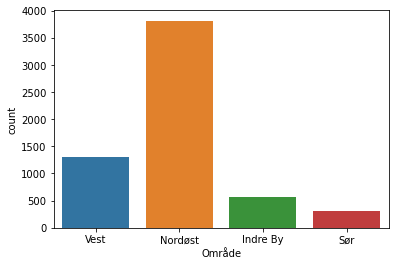

In [58]:
sns.countplot(x='Område', data=df);

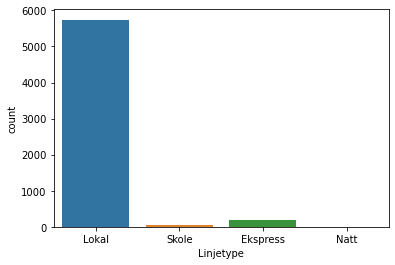

In [59]:
sns.countplot(x='Linjetype', data=df);

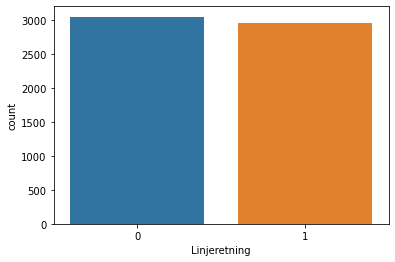

In [60]:
sns.countplot(x='Linjeretning', data=df);

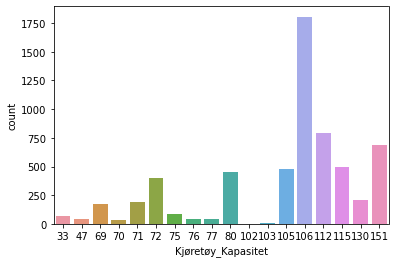

In [61]:
sns.countplot(x='Kjøretøy_Kapasitet', data=df);

In [62]:
Tabell = df.drop(["TurId", "Dato","Område","Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra",  "Linjetype", "Linjenavn", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra","Holdeplass_Fra","Holdeplass_Til","Kommune"], axis=1)

In [63]:
df_dum = pd.get_dummies(Tabell, drop_first=True)

In [64]:
df_dum

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord,Test,Test2,Fylke_Viken,Linjefylke_Viken
0,0,112,5,105300,105353,1,1
1,0,112,5,131200,131220,1,1
2,0,112,6,101900,101856,1,1
3,1,112,10,135100,135204,1,1
4,1,112,10,73300,73413,1,1
...,...,...,...,...,...,...,...
5995,1,151,2,161000,162318,1,1
5996,0,151,2,55900,60032,1,1
5997,1,106,3,173200,174243,0,0
5998,0,151,5,55900,60011,0,1


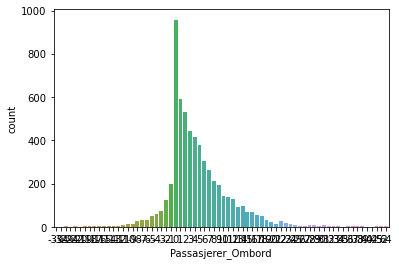

In [65]:
sns.countplot(x='Passasjerer_Ombord', data=df);

In [66]:
df["Linjetype"].value_counts()

Lokal       5741
Ekspress     193
Skole         63
Natt           3
Name: Linjetype, dtype: int64

<AxesSubplot:>

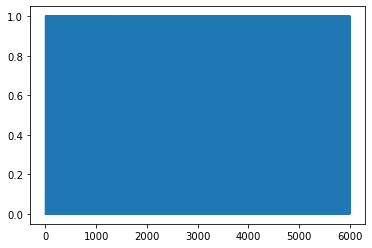

In [67]:
df["Linjeretning"].plot.line()

<AxesSubplot:>

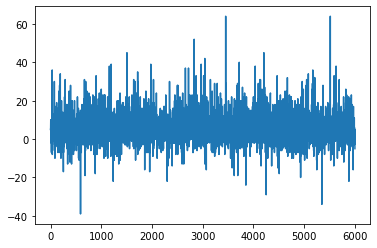

In [68]:
df["Passasjerer_Ombord"].plot.line()

<AxesSubplot:>

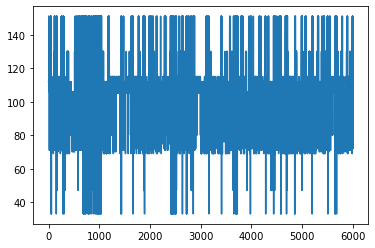

In [69]:
df["Kjøretøy_Kapasitet"].plot.line()

In [70]:
df["Test"]=df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"].replace(':', '', regex=True)

In [5]:
df["Test"]

0       105300
1       131200
2       101900
3       135100
4       073300
         ...  
5995    161000
5996    055900
5997    173200
5998    055900
5999    135000
Name: Test, Length: 6000, dtype: object

In [6]:
# Convert to string then int
df["Test"] = df["Test"].astype(str).astype(int)

<AxesSubplot:>

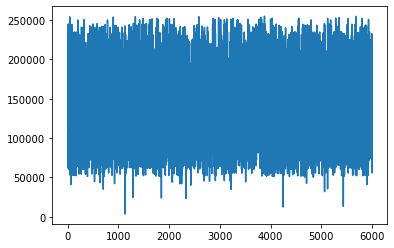

In [7]:
df["Test"].plot.line()

In [45]:
df["Test2"]=df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"].replace(':', '', regex=True)

In [46]:
df["Test2"]

0       105353
1       131220
2       101856
3       135204
4       073413
         ...  
5995    162318
5996    060032
5997    174243
5998    060011
5999    135244
Name: Test2, Length: 6000, dtype: object

In [48]:
df["Test2"] = df["Test2"].astype(str).astype(int)

<AxesSubplot:>

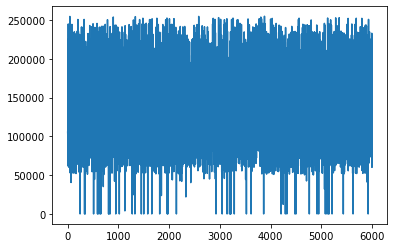

In [51]:
df["Test2"].plot.line()